In [1]:
import warnings
warnings.filterwarnings("ignore")

TensorFlow 是一款用于数值计算的强大的开源软件库，特别适用于大规模机器学习的微调。 它的基本原理很简单：首先在 Python 中定义要执行的计算图（例如图 9-1），然后 TensorFlow 使用该图，并使用优化的 C++ 代码高效运行该图。
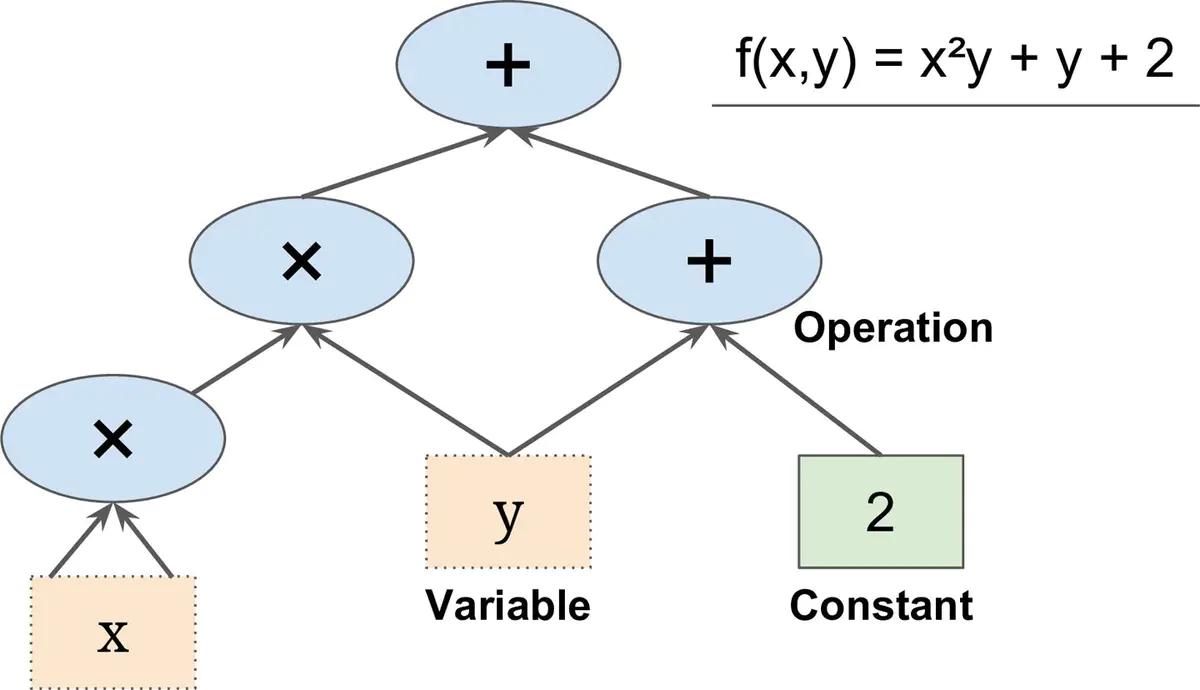

最重要的是，Tensorflow 可以将图分解为多个部分，并在多个 CPU 或 GPU 上并行运行（如图 9-2 所示）。 TensorFlow 还支持分布式计算，因此您可以在数百台服务器上分割计算，从而在合理的时间内在庞大的训练集上训练庞大的神经网络（请参阅第 12 章）。 TensorFlow 可以训练一个拥有数百万个参数的网络，训练集由数十亿个具有数百万个特征的实例组成。 这应该不会让人吃惊，因为 TensorFlow 是 由Google 大脑团队开发的，它支持谷歌的大量服务，例如 Google Cloud Speech，Google Photos 和 Google Search。
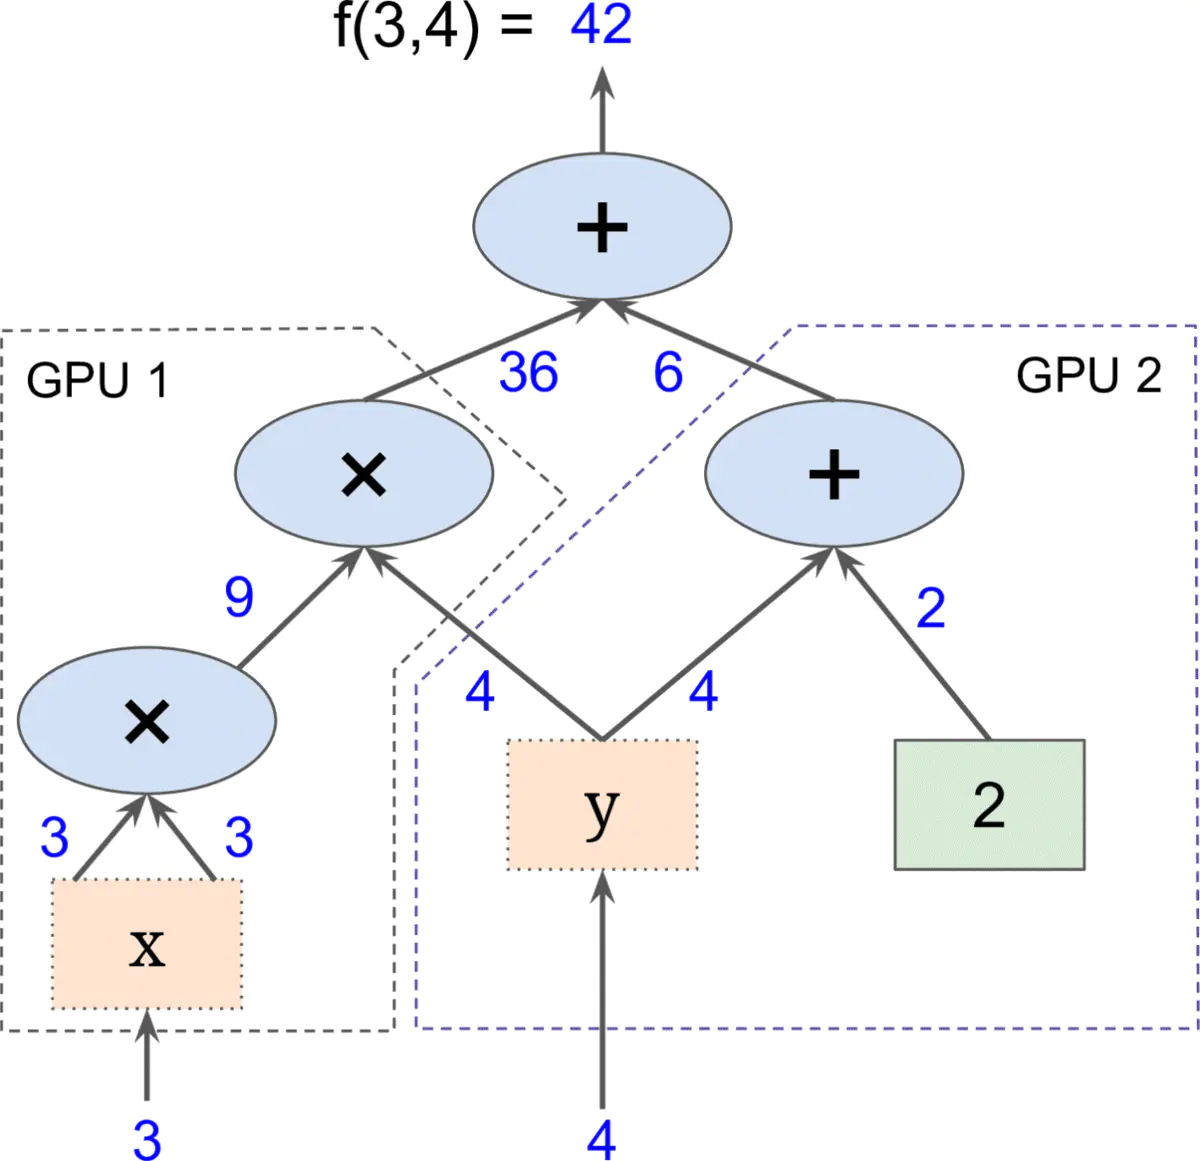

当 TensorFlow 于 2015 年 11 月开放源代码时，已有许多深度学习的流行开源库（表 9-1 列出了一些），公平地说，大部分 TensorFlow 的功能已经存在于一个库或另一个库中。 尽管如此，TensorFlow 的整洁设计，可扩展性，灵活性和出色的文档（更不用说谷歌的名字）迅速将其推向了榜首。 简而言之，TensorFlow 的设计灵活性，可扩展性和生产就绪性，现有框架可以说只有其中三种可用。 这里有一些 TensorFlow 的亮点：

它不仅在 Windows，Linux 和 MacOS 上运行，而且在移动设备上运行，包括 iOS 和 Android。

它提供了一个非常简单的 Python API，名为 TF.Learn2（tensorflow.con trib.learn），与 Scikit-Learn 兼容。正如你将会看到的，你可以用几行代码来训练不同类型的神经网络。之前是一个名为 Scikit Flow（或 Skow）的独立项目。

它还提供了另一个简单的称为 TF-slim（tensorflow.contrib.slim）的 API 来简化构建，训练和求出神经网络。

其他几个高级 API 已经在 TensorFlow 之上独立构建，如 Keras 或 Pretty Tensor。

它的主要 Python API 提供了更多的灵活性（以更高复杂度为代价）来创建各种计算，包括任何你能想到的神经网络结构。

它包括许多 ML 操作的高效 C ++ 实现，特别是构建神经网络所需的 C++ 实现。还有一个 C++ API 来定义您自己的高性能操作。

它提供了几个高级优化节点来搜索最小化损失函数的参数。由于 TensorFlow 自动处理计算您定义的函数的梯度，因此这些非常易于使用。这称为自动分解（或autodiff）。

它还附带一个名为 TensorBoard 的强大可视化工具，可让您浏览计算图表，查看学习曲线等。

Google 还推出了云服务来运行 TensorFlow 图（https://cloud.google.com/ml-engine/）。

最后，它拥有一支充满热情和乐于助人的开发团队，以及一个不断成长的社区，致力于改善它。它是 GitHub 上最受欢迎的开源项目之一，并且越来越多的优秀项目正在基于TF构建（例如，查看 https://www.tensorflow.org/ 或 https://github.com/jtoy/awesome-tensorflow）。 要问技术问题，您应该使用 http://stackoverflow.com/ 并用tensorflow标记您的问题。您可以通过 GitHub 提交错误和功能请求。有关一般讨论，请加入 Google 小组（https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss）。
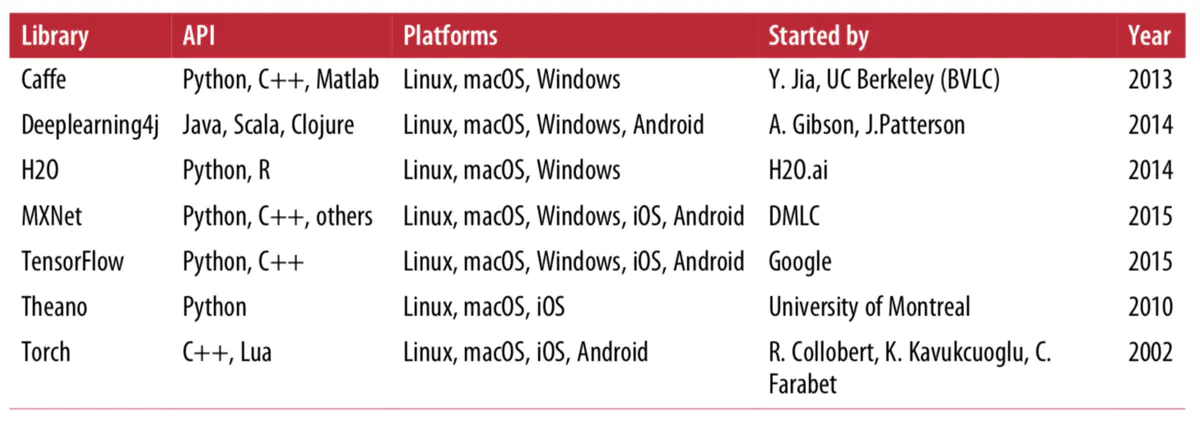

在本章中，我们将介绍 TensorFlow 的基础知识，从安装到创建，运行，保存和可视化简单的计算图。 在构建第一个神经网络之前掌握这些基础知识很重要（我们将在下一章中介绍）。
## 安装
让我们开始吧！假设您按照第 2 章中的安装说明安装了 Jupyter 和 Scikit-Learn，您可以简单地使用pip来安装 TensorFlow。 如果你使用virtualenv创建了一个独立的环境，你首先需要激活它：

<pre>
$ cd $ML_PATH               # Your ML working directory (e.g., $HOME/ml)
$ source env/bin/activate
</pre>

下一步，安装 Tensorflow。

In [2]:
pip install --upgrade tensorflow


The following command must be run outside of the IPython shell:

    $ pip install --upgrade tensorflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


对于 GPU 支持，你需要安装tensorflow-gpu而不是tensorflow。具体请参见 12 章内容。

为了测试您的安装，请输入一下命令。其输出应该是您安装的 Tensorflow 的版本号。<br>

In [3]:
import tensorflow
print(tensorflow.__version__)

1.11.0


## 创造第一个图谱，然后运行它

In [4]:
import tensorflow as tf
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")  
f = x*x*y + y + 2  

这就是它的一切！ 最重要的是要知道这个代码实际上并不执行任何计算，即使它看起来像(尤其是最后一行）。 它只是创建一个计算图谱。 事实上，变量都没有初始化。要画出此图，你需要打开一个 TensorFlow 会话并使用它初始化变量并求出f。TensorFlow 会话负责处理在诸如 CPU 和 GPU 之类的设备上的操作并运行它们，并且它保留所有变量值。以下代码创建一个会话，初始化变量，并求出f，然后关闭会话（释放资源）

In [5]:
# way1 
sess = tf.Session()  
sess.run(x.initializer)  
sess.run(y.initializer)  
result = sess.run(f)  
  
print(result)  
sess.close()  

42


不得不每次重复sess.run() 有点麻烦，但幸运的是有一个更好的方法

In [6]:
# way3  
init = tf.global_variables_initializer()  # prepare an init node

with tf.Session() as sess:
    init.run()  # actually initialize all the variables
    result = f.eval()
with tf.Session() as sess:  
    x.initializer.run()  
    y.initializer.run()  
    result = f.eval()  
print(result) 

42


在with块中，会话被设置为默认会话。 调用x.initializer.run()等效于调用tf.get_default_session().run(x.initial)，f.eval()等效于调用tf.get_default_session().run(f)。 这使得代码更容易阅读。 此外，会话在块的末尾自动关闭。
你可以使用global_variables_initializer() 函数，而不是手动初始化每个变量。 请注意，它实际上没有立即执行初始化，而是在图谱中创建一个当程序运行时所有变量都会初始化的节点：

In [7]:
# way3  
init = tf.global_variables_initializer()  # prepare an init node

with tf.Session() as sess:
    init.run()  # actually initialize all the variables
    result = f.eval()
print(result)

42


在 Jupyter 内部或在 Python shell 中，您可能更喜欢创建一个InteractiveSession。 与常规会话的唯一区别是，当创建InteractiveSession时，它将自动将其自身设置为默认会话，因此您不需要使用模块（但是您需要在完成后手动关闭会话）

In [8]:
# way4  
init = tf.global_variables_initializer()  
sess = tf.InteractiveSession()  
init.run()  
result = f.eval()  
print(result)  
sess.close()

42


TensorFlow 程序通常分为两部分：第一部分构建计算图谱（这称为构造阶段），第二部分运行它（这是执行阶段）。 构建阶段通常构建一个表示 ML 模型的计算图谱,然后对其进行训练,计算。 执行阶段通常运行循环，重复地求出训练步骤（例如，每个小批次），逐渐改进模型参数。
## 管理图谱

您创建的任何节点都会自动添加到默认图形中

In [9]:
x1 = tf.Variable(1)  
x1.graph is tf.get_default_graph()  

True

在大多数情况下，这是很好的，但有时您可能需要管理多个独立图形。 您可以通过创建一个新的图形并暂时将其设置为一个块中的默认图形，如下所示：

In [10]:
graph = tf.Graph()  
with graph.as_default():  
    x2 = tf.Variable(2) 
print(x2.graph is graph  )
x2.graph is tf.get_default_graph()  

True


False

提示
在 Jupyter（或 Python shell）中，通常在实验时多次运行相同的命令。 因此，您可能会收到包含许多重复节点的默认图形。 一个解决方案是重新启动 Jupyter 内核（或 Python shell），但是一个更方便的解决方案是通过运行tf.reset_default_graph()来重置默认图。


## 节点值的生命周期
求出节点时，TensorFlow 会自动确定所依赖的节点集，并首先求出这些节点。 例如，考虑以下代码：

In [11]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


在单进程 TensorFlow 中，多个会话不共享任何状态，即使它们复用同一个图（每个会话都有自己的每个变量的副本）。 在分布式 TensorFlow 中，变量状态存储在服务器上，而不是在会话中，因此多个会话可以共享相同的变量。

## 用TensorFlow做线性回归
TensorFlow 操作（也简称为 ops）可以采用任意数量的输入并产生任意数量的输出。 例如，加法运算和乘法运算都需要两个输入并产生一个输出。 常量和变量不输入（它们被称为源操作）。 输入和输出是称为张量的多维数组（因此称为“tensor flow”）。 就像 NumPy 数组一样，张量具有类型和形状。 实际上，在 Python API 中，张量简单地由 NumPyndarray表示。 它们通常包含浮点数，但您也可以使用它们来传送字符串（任意字节数组）。

迄今为止的示例，张量只包含单个标量值，但是当然可以对任何形状的数组执行计算。例如，以下代码操作二维数组来对加利福尼亚房屋数据集进行线性回归（在第 2 章中介绍）。它从获取数据集开始；之后它会向所有训练实例添加一个额外的偏置输入特征（x0 = 1）（它使用 NumPy 进行，因此立即运行）；之后它创建两个 TensorFlow 常量节点X和y来保存该数据和目标，并且它使用 TensorFlow 提供的一些矩阵运算来定义theta。这些矩阵函数transpose()，matmul()和matrix_inverse()是不言自明的，但是像往常一样，它们不会立即执行任何计算；相反，它们会在图形中创建在运行图形时执行它们的节点。您可以认识到θ的定义对应于方程 。

最后，代码创建一个session并使用它来求出theta。

In [12]:
import numpy as np  
from sklearn.datasets import fetch_california_housing  
housing = fetch_california_housing()  
m, n = housing.data.shape  
#np.c_按colunm来组合array  
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data] 
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")  
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")  
XT = tf.transpose(X)  
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)  
with tf.Session() as sess:  
    theta_value = theta.eval()  
print(theta_value)  

[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


如果你有一个 GPU 的话，上述代码相较于直接使用 NumPy 计算正态方程式的主要优点是 TensorFlow 会自动运行在你的 GPU 上（如果安装了支持 GPU 的 TensorFlow，则 TensorFlow 将自动运行在 GPU 上，请参阅第 12 章了解更多详细信息）

## 实现梯度下降
让我们尝试使用批量梯度下降（在第 4 章中介绍），而不是正态方程。 首先，我们将通过手动计算梯度来实现，然后我们将使用 TensorFlow 的自动扩展功能来使 TensorFlow 自动计算梯度，最后我们将使用几个 TensorFlow 的优化器。

**警告**
当使用梯度下降时，请记住，首先要对输入特征向量进行归一化，否则训练可能要慢得多。 您可以使用 TensorFlow，NumPy，Scikit-Learn 的StandardScaler或您喜欢的任何其他解决方案。 以下代码假定此规范化已经完成。

## 手动计算梯度
以下代码清晰易懂，除了几个新元素：

random_uniform()函数在图形中创建一个节点，它将生成包含随机值的张量，给定其形状和值作用域，就像 NumPy 的rand()函数一样。<br>
assign()函数创建一个为变量分配新值的节点。 在这种情况下，它实现了批次梯度下降步骤 。<br>
主循环一次又一次（共n_epochs次）执行训练步骤，每 100 次迭代都打印出当前均方误差（MSE）。 你应该看到 MSE 在每次迭代中都会下降。

In [13]:
from sklearn.preprocessing import scale
housing = fetch_california_housing()  
m, n = housing.data.shape  
m, n = housing.data.shape  
#np.c_按colunm来组合array  
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]  
scaled_housing_data_plus_bias = scale(housing_data_plus_bias)  
n_epochs = 1000  
learning_rate = 0.01  
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")  
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")  
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")  
y_pred = tf.matmul(X, theta, name="predictions")  
error = y_pred - y  
mse = tf.reduce_mean(tf.square(error), name="mse")  
gradients = 2/m * tf.matmul(tf.transpose(X), error)  
training_op = tf.assign(theta, theta - learning_rate * gradients)  
init = tf.global_variables_initializer()  
with tf.Session() as sess:  
    sess.run(init)  
    for epoch in range(n_epochs):  
        if epoch % 100 == 0:  
            print("Epoch", epoch, "MSE =", mse.eval())  
        sess.run(training_op)  
    best_theta = theta.eval()  

Epoch 0 MSE = 9.693024
Epoch 100 MSE = 4.9001136
Epoch 200 MSE = 4.8607974
Epoch 300 MSE = 4.846623
Epoch 400 MSE = 4.836368
Epoch 500 MSE = 4.82868
Epoch 600 MSE = 4.8228784
Epoch 700 MSE = 4.81848
Epoch 800 MSE = 4.8151293
Epoch 900 MSE = 4.8125634


## Using autodiﬀ
前面的代码工作正常，但它需要从代价函数（MSE）中利用数学公式推导梯度。 在线性回归的情况下，这是相当容易的，但是如果你必须用深层神经网络来做这个事情，你会感到头痛：这将是乏味和容易出错的。 您可以使用符号求导来为您自动找到偏导数的方程式，但结果代码不一定非常有效。

为了理解为什么，考虑函数f(x) = exp(exp(exp(x)))。如果你知道微积分，你可以计算出它的导数f'(x) = exp(x) * exp(exp(x)) * exp(exp(exp(x)))。如果您按照普通的计算方式分别去写f(x)和f'(x)，您的代码将不会如此有效。 一个更有效的解决方案是写一个首先计算exp(x)，然后exp(exp(x))，然后exp(exp(exp(x)))的函数，并返回所有三个。这直接给你（第三项）f(x)，如果你需要求导，你可以把这三个子式相乘，你就完成了。 通过传统的方法，您不得不将exp函数调用 9 次来计算f(x)和f'(x)。 使用这种方法，你只需要调用它三次。

当您的功能由某些任意代码定义时，它会变得更糟。 你能找到方程（或代码）来计算以下函数的偏导数吗？提示：不要尝试。

In [14]:
def my_func(a, b):  
    z = 0  
    for i in range(100):  
        z = a * np.cos(z + i) + z * np.sin(b - i)  
    return z  

幸运的是，TensorFlow 的自动计算梯度功能可以计算这个公式：它可以自动高效地为您计算梯度。 只需用以下面这行代码替换上一节中代码的gradients = ...行，代码将继续正常工作：

In [15]:
gradients = tf.gradients(mse, [theta])[0]  

gradients()函数使用一个op（在这种情况下是MSE）和一个变量列表（在这种情况下只是theta），它创建一个ops列表（每个变量一个）来计算op的梯度变量。 因此，梯度节点将计算 MSE 相对于theta的梯度向量。

自动计算梯度有四种主要方法。 它们总结在表 9-2 中。 TensorFlow 使用反向模式，这是完美的（高效和准确），当有很多输入和少量的输出，如通常在神经网络的情况。 它只需要通过  次图遍历即可计算所有输出的偏导数。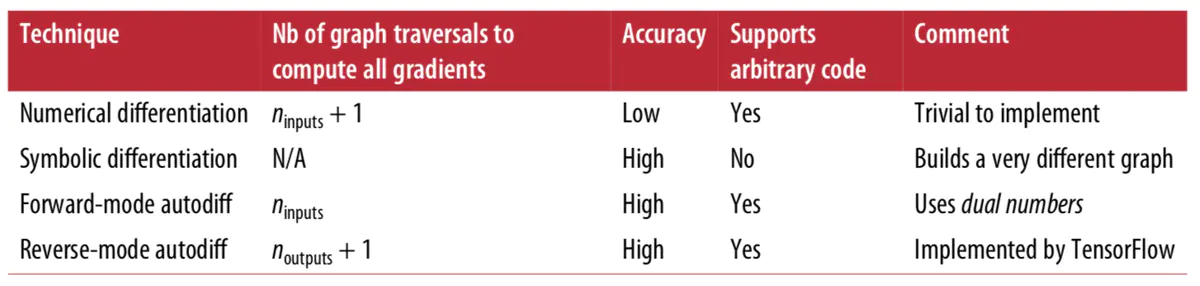

## 使用优化器
所以还是要用 TensorFlow 自动计算梯度。 但它还有更好的方法：它还提供了一些可以直接使用的优化器，包括梯度下降优化器。您可以使用以下代码简单地替换以前的gradients = ...和training_op = ...行，并且一切都将正常工作：

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)  
training_op = optimizer.minimize(mse) 

如果要使用其他类型的优化器，则只需要更改一行。 例如，您可以通过定义优化器来使用动量优化器（通常会比渐变收敛的收敛速度快得多；参见第 11 章）

In [17]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)  

## 将数据提供给训练算法
我们尝试修改以前的代码来实现小批量梯度下降（Mini-batch Gradient Descent）。 为此，我们需要一种在每次迭代时用下一个小批量替换X和Y的方法。 最简单的方法是使用占位符（placeholder）节点。 这些节点是特别的，因为它们实际上并不执行任何计算，只是输出运行时的数据。 它们通常用于在训练期间将训练数据传递给 TensorFlow。 如果在运行时没有为占位符指定值，则会收到异常。

要创建占位符节点，您必须调用placeholder()函数并指定输出张量的数据类型。 或者，您还可以指定其形状，如果要强制执行。 如果指定维度为None，则表示“任何大小”。例如，以下代码创建一个占位符节点A，还有一个节点B = A + 5。当我们求出B时，我们将一个feed_dict传递给eval()方法并指定A的值。注意，A必须具有 2 级（即它必须是二维的），并且必须有三列（否则引发异常），但它可以有任意数量的行。


In [18]:
A = tf.placeholder(tf.float32, shape=(None, 3))  
B = A + 5  
with tf.Session() as sess:  
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})  
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})  
print(B_val_1)      

[[6. 7. 8.]]


您实际上可以提供任何操作的输出，而不仅仅是占位符。 在这种情况下，TensorFlow 不会尝试求出这些操作；它使用你提供的值。

要实现小批量渐变下降，我们只需稍微调整现有的代码。 首先更改X和Y的定义，使其定义为占位符节点：

In [19]:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")  
y = tf.placeholder(tf.float32, shape=(None, 1), name="y") 

然后定义批量大小并计算总批次数：

In [20]:
batch_size = 100  
n_batches = int(np.ceil(m / batch_size)) 

最后，在执行阶段，逐个获取小批量，然后在求出依赖于X和y的值的任何一个节点时，通过feed_dict提供X和y的值。

In [21]:
'''
def fetch_batch(epoch, batch_index, batch_size):
    [...] # load the data from disk
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    best_theta = theta.eval()
'''

'\ndef fetch_batch(epoch, batch_index, batch_size):\n    [...] # load the data from disk\n    return X_batch, y_batch\n\nwith tf.Session() as sess:\n    sess.run(init)\n\n    for epoch in range(n_epochs):\n        for batch_index in range(n_batches):\n            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)\n            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})\n    best_theta = theta.eval()\n'

MINI-BATCH 完整代码

In [22]:
import numpy as np  
from sklearn.datasets import fetch_california_housing  
import tensorflow as tf  
from sklearn.preprocessing import StandardScaler  
  
housing = fetch_california_housing()  
m, n = housing.data.shape  
print("数据集:{}行,{}列".format(m,n))  
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]  
scaler = StandardScaler()  
scaled_housing_data = scaler.fit_transform(housing.data)  
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]  
  
n_epochs = 1000  
learning_rate = 0.01  
  
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")  
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")  
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")  
y_pred = tf.matmul(X, theta, name="predictions")  
error = y_pred - y  
mse = tf.reduce_mean(tf.square(error), name="mse")  
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)  
training_op = optimizer.minimize(mse)  
  
init = tf.global_variables_initializer()  
  
n_epochs = 10  
batch_size = 100  
n_batches = int(np.ceil(m / batch_size)) # ceil() 方法返回 x 的值上限 - 不小于 x 的最小整数。  
  
def fetch_batch(epoch, batch_index, batch_size):  
    know = np.random.seed(epoch * n_batches + batch_index)  # not shown in the book  
    print("我是know:",know)  
    indices = np.random.randint(m, size=batch_size)  # not shown  
    X_batch = scaled_housing_data_plus_bias[indices] # not shown  
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown  
    return X_batch, y_batch  
  
with tf.Session() as sess:  
    sess.run(init)  
  
    for epoch in range(n_epochs):  
        for batch_index in range(n_batches):  
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)  
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})  
  
    best_theta = theta.eval()  
  
print(best_theta)  

数据集:20640行,8列
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: Non

我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None

我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None
我是know: None

## 保存和恢复模型
一旦你训练了你的模型，你应该把它的参数保存到磁盘，所以你可以随时随地回到它，在另一个程序中使用它，与其他模型比较，等等。 此外，你可能希望在训练期间定期保存检查点，以便如果你的计算机在训练过程中崩溃，你可以从上次检查点继续进行，而不是从头开始。

TensorFlow 可以轻松保存和恢复模型。 只需在构造阶段结束（创建所有变量节点之后）创建一个保存节点; 那么在执行阶段，只要你想保存模型，只要调用它的save()方法:


In [23]:
[...]
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
[...]
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0: # checkpoint every 100 epochs
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
            ## sess.run(training_op)
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")


恢复模型同样容易：在构建阶段结束时创建一个保存器，就像之前一样，但是在执行阶段的开始，不是使用init节点初始化变量，你可以调用restore()方法 的保存器对象：

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    [...]

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


默认情况下，保存器将以自己的名称保存并还原所有变量，但如果需要更多控制，则可以指定要保存或还原的变量以及要使用的名称。 例如，以下保存器将仅保存或恢复theta变量，它的键名称是weights：

In [25]:
saver = tf.train.Saver({"weights": theta})

完整代码

In [26]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
m, n = housing.data.shape
print("数据集:{}行,{}列".format(m,n))
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

n_epochs = 1000  # not shown in the book
learning_rate = 0.01  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")  # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")  # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")  # not shown
error = y_pred - y  # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")  # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)  # not shown
training_op = optimizer.minimize(mse)  # not shown

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())  # not shown
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)

    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt") #找到tmp文件夹就找

数据集:20640行,8列
Epoch 0 MSE = 2.7544262
Epoch 100 MSE = 0.632222
Epoch 200 MSE = 0.5727805
Epoch 300 MSE = 0.5585007
Epoch 400 MSE = 0.54907
Epoch 500 MSE = 0.54228795
Epoch 600 MSE = 0.5373789
Epoch 700 MSE = 0.533822
Epoch 800 MSE = 0.5312425
Epoch 900 MSE = 0.5293704


## 使用 TensorBoard 展现图形和训练曲线
所以现在我们有一个使用小批量梯度下降训练线性回归模型的计算图谱，我们正在定期保存检查点。 听起来很复杂，不是吗？ 然而，我们仍然依靠print()函数可视化训练过程中的进度。 有一个更好的方法：进入 TensorBoard。如果您提供一些训练统计信息，它将在您的网络浏览器中显示这些统计信息的良好交互式可视化（例如学习曲线）。 您还可以提供图形的定义，它将为您提供一个很好的界面来浏览它。 这对于识别图中的错误，找到瓶颈等是非常有用的。

第一步是调整程序，以便将图形定义和一些训练统计信息（例如，training_error（MSE））写入 TensorBoard 将读取的日志目录。 您每次运行程序时都需要使用不同的日志目录，否则 TensorBoard 将会合并来自不同运行的统计信息，这将会使可视化混乱。 最简单的解决方案是在日志目录名称中包含时间戳。 在程序开头添加以下代码：

In [27]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

接下来，在构建阶段结束时添加以下代码：

In [28]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

第一行创建一个节点，这个节点将求出 MSE 值并将其写入 TensorBoard 兼容的二进制日志字符串（称为摘要）中。 第二行创建一个FileWriter，你将用它来将摘要写入日志目录中的日志文件中。 第一个参数指示日志目录的路径（在本例中为tf_logs/run-20160906091959/，相对于当前目录）。 第二个（可选）参数是你想要可视化的图形。 创建时，文件写入器创建日志目录（如果需要），并将其定义在二进制日志文件（称为事件文件）中。

接下来，您需要更新执行阶段，以便在训练期间定期求出mse_summary节点（例如，每 10 个小批量）。 这将输出一个摘要，然后可以使用file_writer写入事件文件。 以下是更新的代码：
处。

'''
for batch_index in range(n_batches):
    X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
    if batch_index % 10 == 0:
        summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
        step = epoch * n_batches + batch_index
        file_writer.add_summary(summary_str, step)
    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
'''

警告<br>
避免在每一个训练阶段记录训练数据，因为这会大大减慢训练速度（以上代码每 10 个小批量记录一次）
最后，要在程序结束时关闭FileWriter：

In [29]:
file_writer.close()

完整代码

In [30]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
m, n = housing.data.shape
print("数据集:{}行,{}列".format(m,n))
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = r"D://tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()
file_writer.close()
print(best_theta)

数据集:20640行,8列
[[ 2.070016  ]
 [ 0.8204561 ]
 [ 0.1173173 ]
 [-0.22739051]
 [ 0.3113402 ]
 [ 0.00353193]
 [-0.01126994]
 [-0.91643935]
 [-0.8795008 ]]


现在运行程序：它会创建日志目录，将事件文件写入其中，包括图的定义和MSE值。<br>打开shell，进入工作目录，输入ls -l tf_logs/run*，列出日志目录的内容：

现在启动TensorBoard服务。你需要激活虚拟环境，然后输入tensorboard命令，将其只想根日志目录，启动服务。这样就能启动TensorBoard，监听端口是6006（“goog”字母的倒立）：
。

In [31]:
'''
$ source env/bin/activate
$ tensorboard --logdir tf_logs/
Starting TensorBoard  on port 6006
(You can navigate to http://0.0.0.0:6006)
'''

'\n$ source env/bin/activate\n$ tensorboard --logdir tf_logs/\nStarting TensorBoard  on port 6006\n(You can navigate to http://0.0.0.0:6006)\n'

然后打开浏览器访问http://0.0.0.0:6006/（或http://localhost:6006/），就进入了TensorBoard。在Events栏，可以在右边看到MSE。如果点击MSE，就可以看到两次训练过程中MSE的图形（见图9-3）。可以勾选曲线、放大缩小、悬停获得更多信息。


## 命名作用域
当处理更复杂的模型（如神经网络）时，计算图极易与数千个节点混淆。 为了避免这种情况，您可以创建命名作用域来对相关节点进行分组。 例如，我们修改以前的代码来定义名为loss的命名作用域内的错误和mse操作：

In [32]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")
print(error.op.name)
print(mse.op.name)

loss/sub
loss/mse


在 TensorBoard 中，mse和error节点现在出现在loss命名空间中，默认情况下会出现崩溃
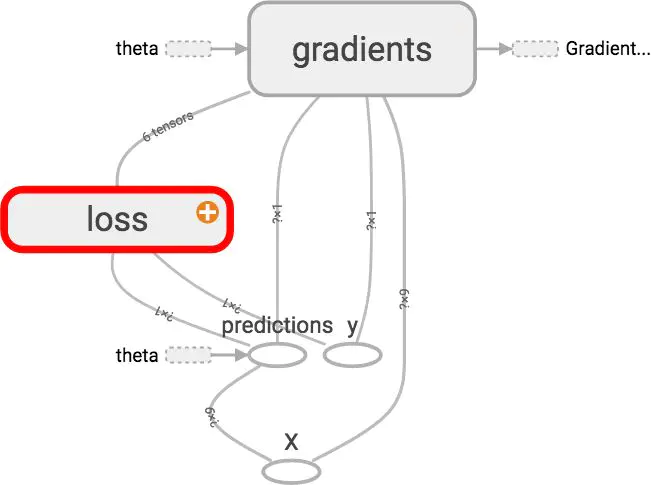
完整代码

In [33]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
m, n = housing.data.shape
print("数据集:{}行,{}列".format(m,n))
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = r"D://tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

file_writer.flush()
file_writer.close()
print("Best theta:")
print(best_theta)

数据集:20640行,8列
Best theta:
[[ 2.070016  ]
 [ 0.8204561 ]
 [ 0.1173173 ]
 [-0.22739051]
 [ 0.3113402 ]
 [ 0.00353193]
 [-0.01126994]
 [-0.91643935]
 [-0.8795008 ]]


## 模块性
假设您要创建一个图，它的作用是将两个整流线性单元（ReLU）的输出值相加。 ReLU 计算一个输入值的对应线性函数输出值，如果为正，则输出该结值，否则为 0，如等式 9-1 所示。
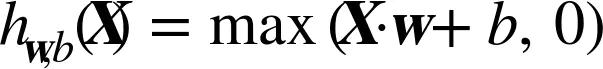

下面的代码做这个工作，但是它是相当重复的：

In [34]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")
z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")
relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2")
output = tf.add(relu1, relu2, name="output")

这样的重复代码很难维护，容易出错（实际上，这个代码包含了一个剪贴错误，你发现了吗？） 如果你想添加更多的 ReLU，会变得更糟。 幸运的是，TensorFlow 可以让您保持 DRY（不要重复自己）：只需创建一个功能来构建 ReLU。 以下代码创建五个 ReLU 并输出其总和（注意，add_n()创建一个计算张量列表之和的操作）：

In [35]:
def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

请注意，创建节点时，TensorFlow 将检查其名称是否已存在，如果它已经存在，则会附加一个下划线，后跟一个索引，以使该名称是唯一的。 因此，第一个 ReLU 包含名为weights，bias，z和relu的节点（加上其他默认名称的更多节点，如MatMul）; 第二个 ReLU 包含名为weights_1，bias_1等节点的节点; 第三个 ReLU 包含名为 weights_2，bias_2的节点，依此类推。 TensorBoard 识别这样的组并将它们折叠在一起以减少混乱（如图 9-6 所示）
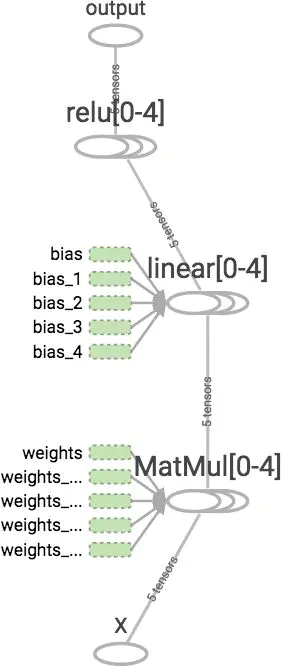

使用名称作用域，您可以使图形更清晰。 简单地将relu()函数的所有内容移动到名称作用域内。 图 9-7 显示了结果图。 请注意，TensorFlow 还通过附加_1，_2等来提供名称作用域的唯一名称。

In [36]:
def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")    # not shown
        b = tf.Variable(0.0, name="bias")                             # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                      # not shown
        return tf.maximum(z, 0., name="max")            

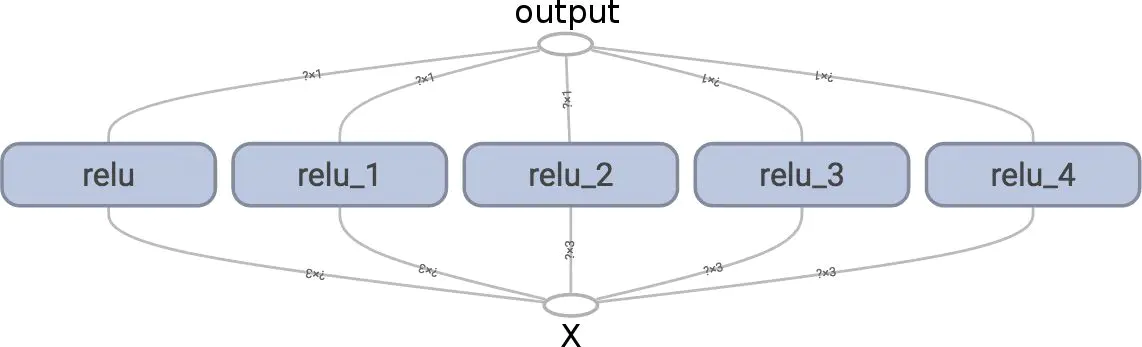

## 共享变量
如果要在图形的各个组件之间共享一个变量，一个简单的选项是首先创建它，然后将其作为参数传递给需要它的函数。 例如，假设要使用所有 ReLU 的共享阈值变量来控制 ReLU 阈值（当前硬编码为 0）。 您可以先创建该变量，然后将其传递给relu()函数：


In [37]:
#reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

这很好：现在您可以使用阈值变量threshold来控制所有 ReLU 的阈值。但是，如果有许多共享参数，比如这一项，那么必须一直将它们作为参数传递，这将是非常痛苦的。许多人创建了一个包含模型中所有变量的 Python 字典，并将其传递给每个函数。另一些则为每个模块创建一个类（例如：一个使用类变量来处理共享参数的 ReLU 类）。另一种选择是在第一次调用时将共享变量设置为relu()函数的属性，如下所示:

In [38]:
def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, relu.threshold, name="max")

TensorFlow 提供了另一个选项，这将提供比以前的解决方案稍微更清洁和更模块化的代码。首先要明白一点，这个解决方案很刁钻难懂，但是由于它在 TensorFlow 中使用了很多，所以值得我们去深入细节。 这个想法是使用get_variable()函数来创建共享变量，如果它还不存在，或者如果已经存在，则复用它。 所需的行为（创建或复用）由当前variable_scope()的属性控制。 例如，以下代码将创建一个名为relu/threshold的变量（作为标量，因为shape = ()，并使用 0.0 作为初始值）：


In [39]:
import tensorflow as tf
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))

请注意，如果变量已经通过较早的get_variable()调用创建，则此代码将引发异常。 这种行为可以防止错误地复用变量。如果要复用变量，则需要通过将变量scope的复用属性设置为True来明确说明（在这种情况下，您不必指定形状或初始值）：

In [40]:
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

该代码将获取现有的relu/threshold变量，如果不存在会引发异常（如果没有使用get_variable()创建）。 或者，您可以通过调用scope的reuse_variables()方法将复用属性设置为true：


In [41]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold = tf.get_variable("threshold")

警告<br>
一旦reuse设置为True，它将不能在块内设置为False。 而且，如果在其中定义其他变量作用域，它们将自动继承reuse = True。 最后，只有通过get_variable()创建的变量才可以这样复用.<br>
先在，您拥有所有需要的部分，使relu()函数访问阈值变量，而不必将其作为参数传递：

In [ ]:
# def relu(X):
#     with tf.variable_scope("relu", reuse=True):
#         threshold = tf.get_variable("threshold")
#         w_shape = int(X.get_shape()[1]), 1                          # not shown
#         w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
#         b = tf.Variable(0.0, name="bias")                           # not shown
#         z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
#         return tf.maximum(z, threshold, name="max")

# X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

# with tf.variable_scope("relu", reuse=True):
#     threshold = tf.get_variable("threshold")
# relus = [relu(X) for relu_index in range(5)]
# output = tf.add_n(relus, name="output")

该代码首先定义relu()函数，然后创建relu/threshold变量（作为标量，稍后将被初始化为 0.0），并通过调用relu()函数构建五个ReLU。relu()函数复用relu/threshold变量，并创建其他 ReLU 节点。

提示<br>
使用get_variable()创建的变量始终以其variable_scope的名称作为前缀命名（例如，relu/threshold），但对于所有其他节点（包括使用tf.Variable()创建的变量），变量作用域的行为就像一个新名称的作用域。 特别是，如果已经创建了具有相同名称的名称作用域，则添加后缀以使该名称是唯一的。 例如，在前面的代码中创建的所有节点（阈值变量除外）的名称前缀为relu_1/到relu_5/，如图 9-8 所示。
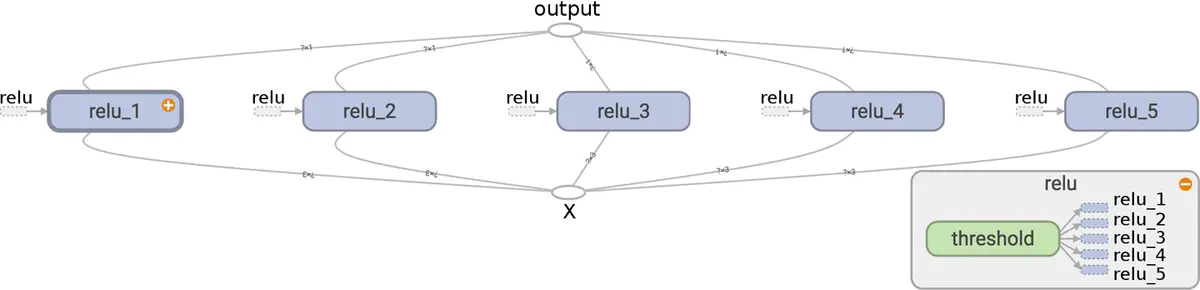

不幸的是，必须在relu()函数之外定义阈值变量，其中 ReLU 代码的其余部分都驻留在其中。 要解决此问题，以下代码在第一次调用时在relu()函数中创建阈值变量，然后在后续调用中重新使用。 现在，relu()函数不必担心名称作用域或变量共享：它只是调用get_variable()，它将创建或复用阈值变量（它不需要知道是哪种情况）。 其余的代码调用relu()五次，确保在第一次调用时设置reuse = False，而对于其他调用来说，reuse = True。

In [ ]:
# def relu(X):
#     threshold = tf.get_variable("threshold", shape=(),
#                                 initializer=tf.constant_initializer(0.0))
#     w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
#     w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
#     b = tf.Variable(0.0, name="bias")                           # not shown
#     z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
#     return tf.maximum(z, threshold, name="max")

# X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
# relus = []
# for relu_index in range(5):
#     with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
#         relus.append(relu(X))
# output = tf.add_n(relus, name="output")

该代码首先定义relu()函数，然后创建relu/threshold变量（作为标量，稍后将被初始化为 0.0），并通过调用relu()函数构建五个ReLU。relu()函数复用relu/threshold变量，并创建其他 ReLU 节点。
提示<br>
使用get_variable()创建的变量始终以其variable_scope的名称作为前缀命名（例如，relu/threshold），但对于所有其他节点（包括使用tf.Variable()创建的变量），变量作用域的行为就像一个新名称的作用域。 特别是，如果已经创建了具有相同名称的名称作用域，则添加后缀以使该名称是唯一的。 例如，在前面的代码中创建的所有节点（阈值变量除外）的名称前缀为relu_1/到relu_5/，如图 9-8 所示。
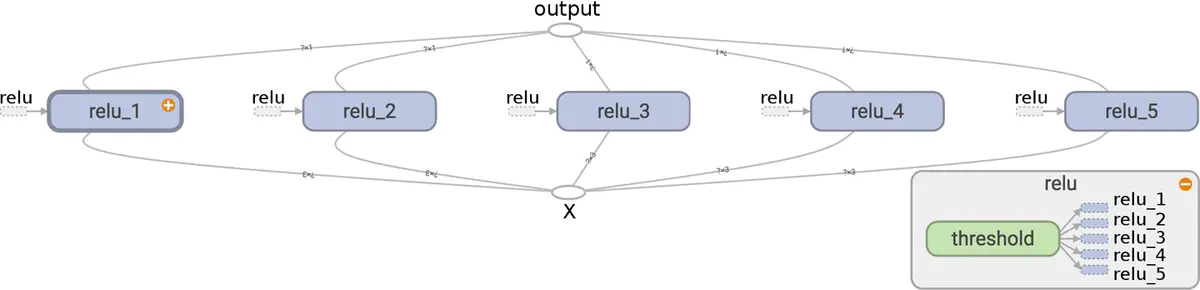

不幸的是，必须在relu()函数之外定义阈值变量，其中 ReLU 代码的其余部分都驻留在其中。 要解决此问题，以下代码在第一次调用时在relu()函数中创建阈值变量，然后在后续调用中重新使用。 现在，relu()函数不必担心名称作用域或变量共享：它只是调用get_variable()，它将创建或复用阈值变量（它不需要知道是哪种情况）。 其余的代码调用relu()五次，确保在第一次调用时设置reuse = False，而对于其他调用来说，reuse = True。

In [52]:
# def relu(X):
#     threshold = tf.get_variable("threshold", shape=(),
#                                 initializer=tf.constant_initializer(0.0))
#     w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
#     w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
#     b = tf.Variable(0.0, name="bias")                           # not shown
#     z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
#     return tf.maximum(z, threshold, name="max")

# X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
# relus = []
# for relu_index in range(5):
#     with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
#         relus.append(relu(X))
# output = tf.add_n(relus, name="output")

成的图形与之前略有不同，因为共享变量存在于第一个 ReLU 中（见图 9-9）。
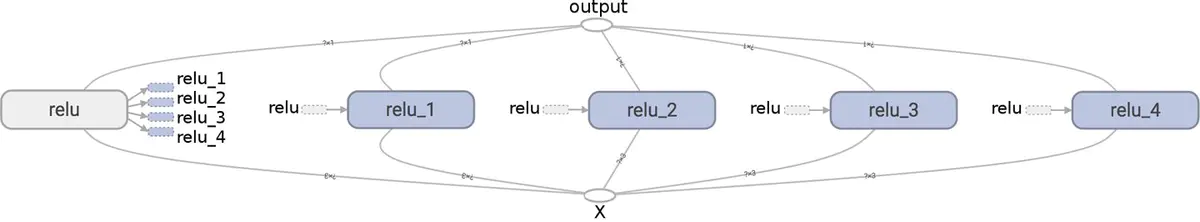

TensorFlow 的介绍到此结束。 我们将在以下章节中讨论更多高级专题，特别是与深层神经网络，卷积神经网络和递归神经网络相关的许多操作，以及如何使用多线程，队列，多个 GPU 以及如何将 TensorFlow 扩展到多台服务器。
